<a href="https://colab.research.google.com/github/KarlaNCano/Extraccion-de-caracteristicas-/blob/main/Actividad4_Extraccion_de_caracteristicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Instalamos librería para análisis de variables categórias
%pip install funpymodeling

In [ ]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
#Carga desde un archivo .xlsx sin indice
Micro_Retailer=pd.read_excel("microretailer_mit_lift_lab.xlsx")

In [ ]:
#Verificamos información del DataFrame
Micro_Retailer.info()

In [ ]:
#Imprimimos las primeras filas o registros del Dataframe
Micro_Retailer.head(5)

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN


**FILTROS BASICOS PARA VARIABLES CUALITATIVAS**


In [ ]:
#Filtro por columnas
filtro=Micro_Retailer.iloc[ : , [1,3,8,9,10,11,12,15,17,18,19,23,24,25,26,27,28,29,30,32]]  #columnas no consecutivas
filtro

,_title,_updated_by,229_store_picture,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,184_store_devices,pictures_of_shelves_if_possible,hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,le_comento_que_toda_esta_informacin_es_confidencial,5_change_store_space_last_year,6_change_employees_average_salary_last_year,20_reviews_finances_monthly,49_inventory_records,18_sales_records,155_sales_registers_used_for,103_number_own_fridges,19_tax_id,310_burnout
0,"November 12, 2022",Salomon Abdala Perez,1 Photo,Tailor,yes,no,no,POS system (i.e. computer + bar code scanner +...,NaN,yes,yes,No cambió,No cambió,yes,Software especializado + computadora,Software especializado + computadora,NaN,NaN,yes,no
1,"November 12, 2022",Salomon Abdala Perez,1 Photo,Grocery store (aka. nanostore),no,yes,yes,Dataphone (i.e. card payments),NaN,yes,yes,Aumentó 15%,No cambió,yes,No lo hago,No lo hago,NaN,NaN,no,no
2,"November 12, 2022",Salomon Abdala Perez,1 Photo,Grocery store (aka. nanostore),yes,no,no,"Dataphone (i.e. card payments),POS system (i.e...",NaN,yes,yes,No cambió,No cambió,yes,En Excel,Software especializado + computadora,NaN,NaN,no,no
3,"November 12, 2022",Salomon Abdala Perez,1 Photo,Grocery store (aka. nanostore),no,no,no,POS system (i.e. computer + bar code scanner +...,NaN,yes,yes,No cambió,No cambió,yes,Software especializado + computadora,Software especializado + computadora,NaN,NaN,yes,no
4,"November 12, 2022",Salomon Abdala Perez,1 Photo,Grocery store (aka. nanostore),yes,no,no,Smartphone,NaN,yes,yes,No cambió,No cambió,yes,En papel,En papel,NaN,NaN,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,"November 3, 2022",Emilio Garza,1 Photo,Grocery store (aka. nanostore),yes,no,no,"Analog cash register,Smartphone",NaN,no,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,"November 3, 2022",Emilio Garza,1 Photo,Grocery store (aka. nanostore),no,no,no,"Analog cash register,Smartphone",NaN,no,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,"November 3, 2022",Emilio Garza,1 Photo,Micro-restaurant (aka. fondita),yes,no,yes,Smartphone,NaN,no,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,"November 3, 2022",Francisco Adán,1 Photo,Micro-restaurant (aka. fondita),no,no,yes,Analog cash register,NaN,no,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Identificar valores nulos por columna
valores_nulos=filtro.isnull().sum()
valores_nulos

_title                                                          0
_updated_by                                                     0
229_store_picture                                               0
232_type_of_store                                               0
108_does_the_micro_retailer_has_a_barred_window_                0
99_does_the_micro_retailer_exhibits_products_outside_           0
102_does_the_micro_retailer_sells_fresh_products_               0
184_store_devices                                               2
pictures_of_shelves_if_possible                               152
hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz      0
le_comento_que_toda_esta_informacin_es_confidencial             0
5_change_store_space_last_year                                 72
6_change_employees_average_salary_last_year                    86
20_reviews_finances_monthly                                    63
49_inventory_records                                           61
18_sales_r

**Métodos de Sustitución de Valores Nulos**

In [ ]:
#Realizamos una copia del dataframe
data=filtro.copy()

In [ ]:
data["pictures_of_shelves_if_possible"] =data["pictures_of_shelves_if_possible"].fillna("NaN")

In [ ]:
data["184_store_devices"] =data["184_store_devices"].fillna(method="bfill")

In [ ]:
data["5_change_store_space_last_year"] =data["5_change_store_space_last_year"].fillna(method="ffill")

In [ ]:
data["6_change_employees_average_salary_last_year"] =data["6_change_employees_average_salary_last_year"].fillna("No cambió")

In [ ]:
data["20_reviews_finances_monthly"] =data["20_reviews_finances_monthly"].fillna(method="bfill")

In [ ]:
data["20_reviews_finances_monthly"] =data["20_reviews_finances_monthly"].fillna(method="ffill")

In [ ]:
data["49_inventory_records"] =data["49_inventory_records"].fillna("Software especializado + computadora")

In [ ]:
data["18_sales_records"] =data["18_sales_records"].fillna(method="bfill")

In [ ]:
data["18_sales_records"] =data["18_sales_records"].fillna(method="ffill")

In [ ]:
data["155_sales_registers_used_for"] =data["155_sales_registers_used_for"].fillna(method="bfill")

In [ ]:
data["155_sales_registers_used_for"] =data["155_sales_registers_used_for"].fillna(method="ffill")

In [ ]:
data["103_number_own_fridges"] =data["103_number_own_fridges"].fillna("1")

In [ ]:
data["19_tax_id"] =data["19_tax_id"].fillna("NaN")

In [ ]:
data["310_burnout"] =data["310_burnout"].fillna("NaN")

In [ ]:
#Corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

_title                                                        0
_updated_by                                                   0
229_store_picture                                             0
232_type_of_store                                             0
108_does_the_micro_retailer_has_a_barred_window_              0
99_does_the_micro_retailer_exhibits_products_outside_         0
102_does_the_micro_retailer_sells_fresh_products_             0
184_store_devices                                             0
pictures_of_shelves_if_possible                               0
hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz    0
le_comento_que_toda_esta_informacin_es_confidencial           0
5_change_store_space_last_year                                0
6_change_employees_average_salary_last_year                   0
20_reviews_finances_monthly                                   0
49_inventory_records                                          0
18_sales_records                        

In [ ]:
#Obtengo un análisis univariado de las variables categóricas
freq_tbl(data)

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(data['_title'])
table1

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro1= table1[table1["frequency"]>1]
Filtro1

In [ ]:
#Ajusto el indice de mi dataframe
Filtro1_index= Filtro1.set_index('_title')
Filtro1_index

,frequency,percentage,cumulative_perc
_title,,,
"November 9, 2022",73,0.426901,0.426901
"November 10, 2022",26,0.152047,0.578947
"November 7, 2022",20,0.116959,0.695906
"November 3, 2022",16,0.093567,0.789474
"November 12, 2022",15,0.087719,0.877193
"November 8, 2022",10,0.058480,0.935673
"November 4, 2022",9,0.052632,0.988304


Text(0, 0.5, 'Frecuencia')

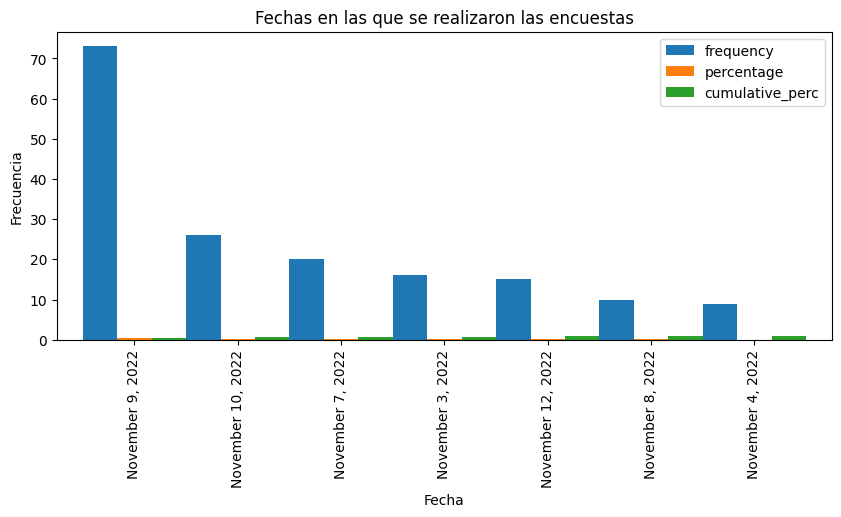

In [ ]:
#Realizamos grafico de barras del dataframe filtrado
Filtro1_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Fechas en las que se realizaron las encuestas')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table2= freq_tbl(data['_updated_by'])
table2

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro2= table2[table2["frequency"]>1]
Filtro2

In [ ]:
#Ajusto el indice de mi dataframe
Filtro2_index= Filtro2.set_index('_updated_by')
Filtro2_index

,frequency,percentage,cumulative_perc
_updated_by,,,
Salomon Abdala Perez,20,0.116959,0.116959
Ángel Francisco Altamirano Campos,16,0.093567,0.210526
José Zapata,14,0.081871,0.292398
Emilio Garza,13,0.076023,0.368421
Benjamin Barbosa,13,0.076023,0.444444
Pedro Contreras,12,0.070175,0.514620
Eduardo Zárate,9,0.052632,0.567251
Alejandro Matias,8,0.046784,0.614035
Harry Hernández,7,0.040936,0.654971


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

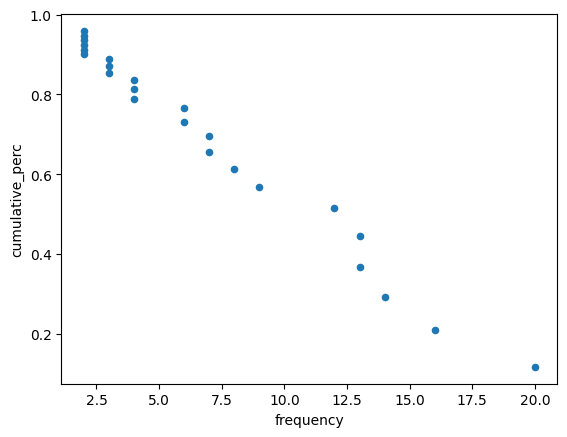

In [ ]:
#Realizamos grafico de dispersión del dataframe filtrado
Filtro2_index.plot("frequency", "cumulative_perc", kind="scatter")

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table3= freq_tbl(data['229_store_picture'])
table3

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro3= table3[table3["frequency"]>1]
Filtro3

In [ ]:
#Ajusto el indice de mi dataframe
Filtro3_index= Filtro3.set_index('229_store_picture')
Filtro3_index

,frequency,percentage,cumulative_perc
229_store_picture,,,
1 Photo,166,0.97076,0.97076
2 Photos,5,0.02924,1.00000


<Axes: xlabel='229_store_picture'>

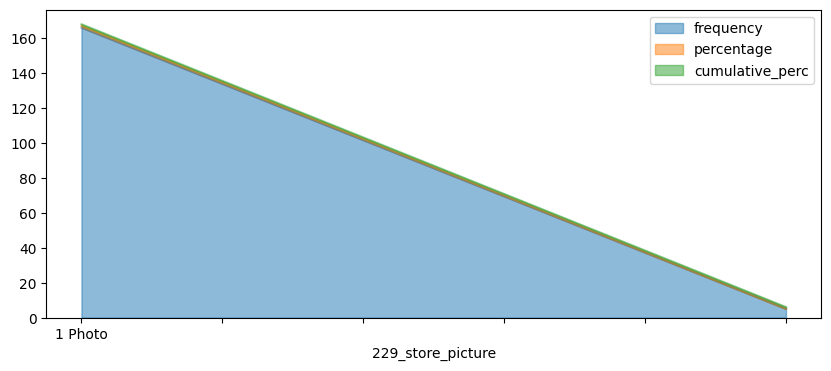

In [ ]:
#Realizamos grafico de área del dataframe filtrado
Filtro3_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table4= freq_tbl(data['232_type_of_store'])
table4

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro4= table4[table4["frequency"]>1]
Filtro4

In [ ]:
#Ajusto el indice de mi dataframe
Filtro4_index= Filtro4.set_index('232_type_of_store')
Filtro4_index

,frequency,percentage,cumulative_perc
232_type_of_store,,,
Grocery store (aka. nanostore),52,0.304094,0.304094
Micro-restaurant (aka. fondita),31,0.181287,0.485380
Dairy products,10,0.058480,0.543860
Cafeteria,6,0.035088,0.578947
Butcher shop,6,0.035088,0.614035
Produce (fruits & vegetables),4,0.023392,0.637427
Handmade products,2,0.011696,0.649123
Papelería,2,0.011696,0.660819
objetos,2,0.011696,0.672515


<Axes: ylabel='frequency'>

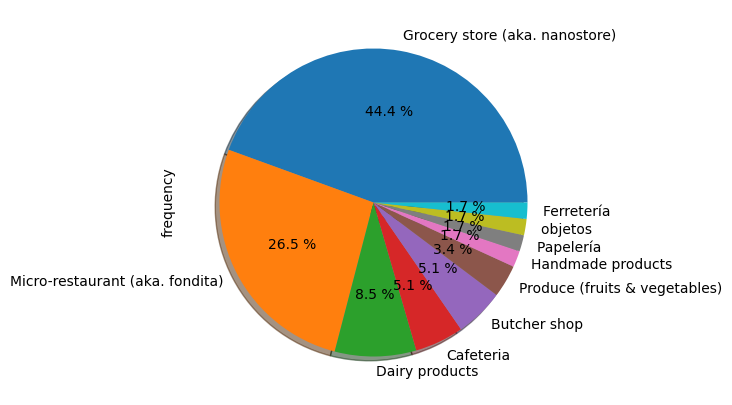

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro4_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table5= freq_tbl(data['108_does_the_micro_retailer_has_a_barred_window_'])
table5

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro5= table5[table5["frequency"]>1]
Filtro5

In [ ]:
#Ajusto el indice de mi dataframe
Filtro5_index= Filtro5.set_index('108_does_the_micro_retailer_has_a_barred_window_')
Filtro5_index

,frequency,percentage,cumulative_perc
108_does_the_micro_retailer_has_a_barred_window_,,,
no,124,0.725146,0.725146
yes,47,0.274854,1.000000


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

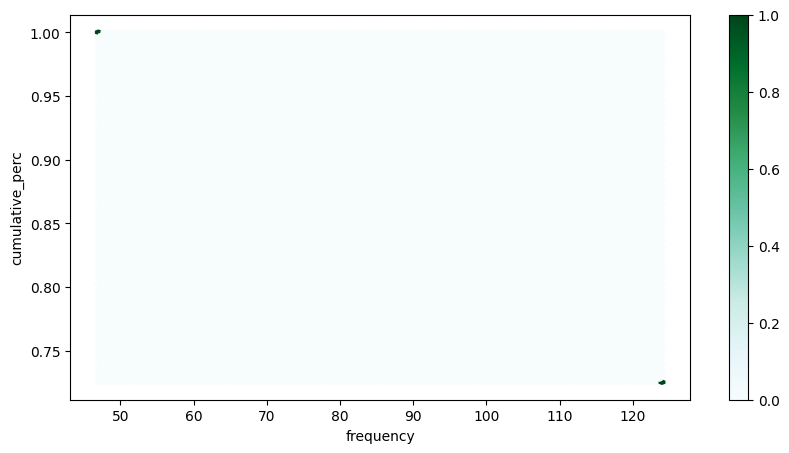

In [ ]:
#Realizamos grafico hexagonal del dataframe filtrado, alternativo al scatter plot
Filtro5_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table6= freq_tbl(data['99_does_the_micro_retailer_exhibits_products_outside_'])
table6

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro6= table6[table6["frequency"]>1]
Filtro6

In [ ]:
#Ajusto el indice de mi dataframe
Filtro6_index= Filtro6.set_index('99_does_the_micro_retailer_exhibits_products_outside_')
Filtro6_index

,frequency,percentage,cumulative_perc
99_does_the_micro_retailer_exhibits_products_outside_,,,
no,120,0.701754,0.701754
yes,51,0.298246,1.000000


Text(0, 0.5, 'Frecuencia')

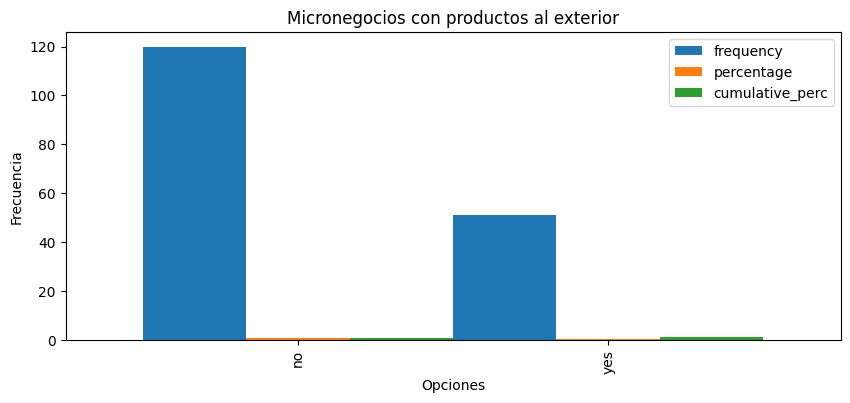

In [ ]:
#Realizamos grafico de barras del dataframe filtrado
Filtro6_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Micronegocios con productos al exterior')
plt.xlabel('Opciones')
plt.ylabel('Frecuencia')

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table7= freq_tbl(data['102_does_the_micro_retailer_sells_fresh_products_'])
table7

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro7= table7[table7["frequency"]>1]
Filtro7

In [ ]:
#Ajusto el indice de mi dataframe
Filtro7_index= Filtro7.set_index('102_does_the_micro_retailer_sells_fresh_products_')
Filtro7_index

,frequency,percentage,cumulative_perc
102_does_the_micro_retailer_sells_fresh_products_,,,
no,105,0.614035,0.614035
yes,66,0.385965,1.000000


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

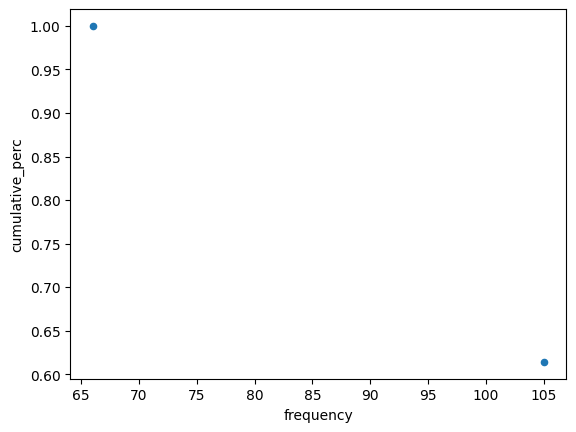

In [ ]:
#Realizamos grafico de dispersión del dataframe filtrado
Filtro7_index.plot("frequency", "cumulative_perc", kind="scatter")

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table8= freq_tbl(data['184_store_devices'])
table8

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro8= table8[table8["frequency"]>1]
Filtro8

In [ ]:
#Ajusto el indice de mi dataframe
Filtro8_index= Filtro8.set_index('184_store_devices')
Filtro8_index

,frequency,percentage,cumulative_perc
184_store_devices,,,
Smartphone,52,0.304094,0.304094
Analog cash register,16,0.093567,0.397661
POS system (i.e. computer + bar code scanner + printer),9,0.052632,0.450292
"POS system (i.e. computer + bar code scanner + printer),Smartphone",9,0.052632,0.502924
"Analog cash register,Smartphone",8,0.046784,0.549708
"Security cameras,Smartphone",7,0.040936,0.590643
"Dataphone (i.e. card payments),Security cameras,Smartphone",5,0.029240,0.619883
Security cameras,5,0.029240,0.649123
"Analog cash register,Security cameras,Smartphone",5,0.029240,0.678363


Text(0, 0.5, 'Frecuencia')

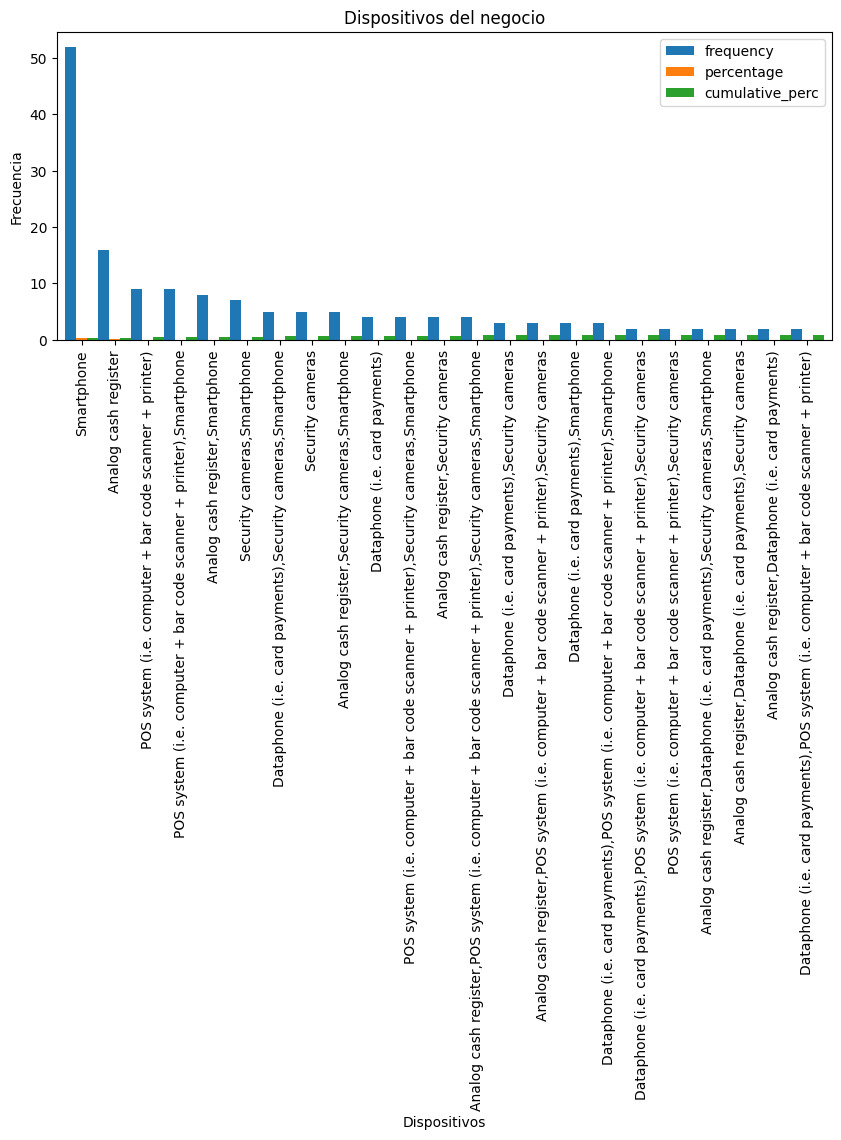

In [ ]:
#Realizamos grafico de barras del dataframe filtrado
Filtro8_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Dispositivos del negocio')
plt.xlabel('Dispositivos')
plt.ylabel('Frecuencia')

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table9= freq_tbl(data['pictures_of_shelves_if_possible'])
table9

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro9= table9[table9["frequency"]>1]
Filtro9

In [ ]:
#Ajusto el indice de mi dataframe
Filtro9_index= Filtro9.set_index('pictures_of_shelves_if_possible')
Filtro9_index

,frequency,percentage,cumulative_perc
pictures_of_shelves_if_possible,,,
NaN,152,0.888889,0.888889
1 Photo,12,0.070175,0.959064
2 Photos,4,0.023392,0.982456
3 Photos,2,0.011696,0.994152


<Axes: ylabel='frequency'>

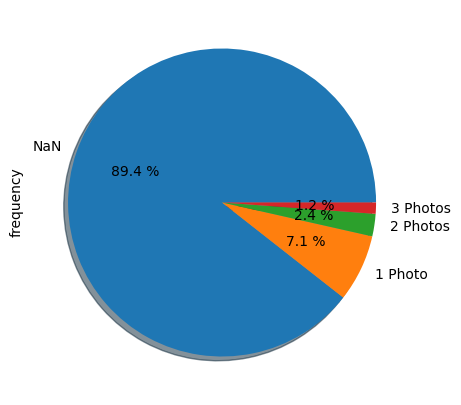

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro9_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table10= freq_tbl(data['hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz'])
table10

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro10= table10[table10["frequency"]>1]
Filtro10

In [ ]:
#Ajusto el indice de mi dataframe
Filtro10_index= Filtro10.set_index('hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz')
Filtro10_index

,frequency,percentage,cumulative_perc
hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,,,
yes,113,0.660819,0.660819
no,58,0.339181,1.000000


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

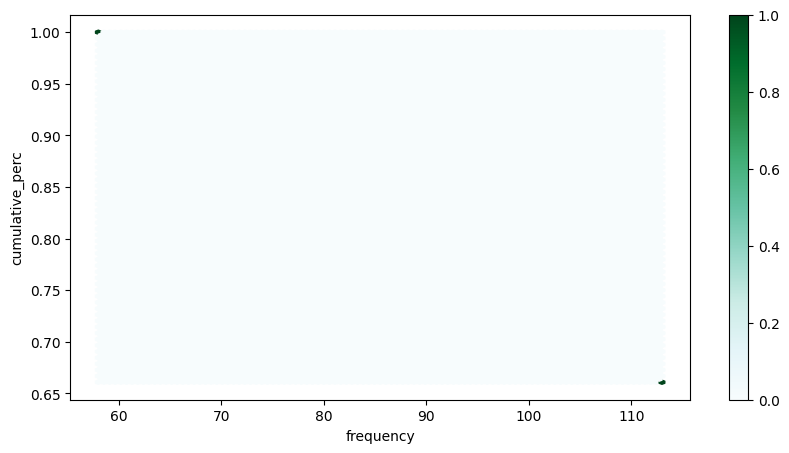

In [ ]:
#Realizamos grafico hexagonal del dataframe filtrado, alternativo al scatter plot
Filtro10_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table11= freq_tbl(data['le_comento_que_toda_esta_informacin_es_confidencial'])
table11

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro11= table11[table11["frequency"]>1]
Filtro11

In [ ]:
#Ajusto el indice de mi dataframe
Filtro11_index= Filtro11.set_index('le_comento_que_toda_esta_informacin_es_confidencial')
Filtro11_index

,frequency,percentage,cumulative_perc
le_comento_que_toda_esta_informacin_es_confidencial,,,
yes,164,0.959064,0.959064
no,7,0.040936,1.000000


Text(0, 0.5, 'Frecuencia')

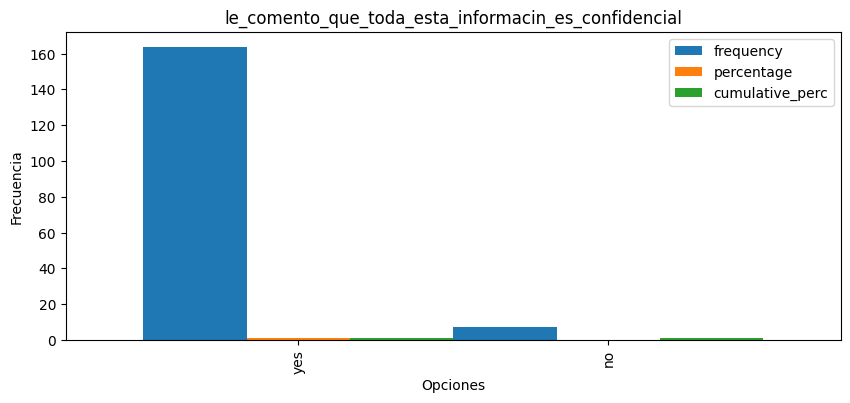

In [ ]:
#Realizamos grafico de barras del dataframe filtrado
Filtro11_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('le_comento_que_toda_esta_informacin_es_confidencial')
plt.xlabel('Opciones')
plt.ylabel('Frecuencia')

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table12= freq_tbl(data['5_change_store_space_last_year'])
table12

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro12= table12[table12["frequency"]>1]
Filtro12

In [ ]:
#Ajusto el indice de mi dataframe
Filtro12_index= Filtro12.set_index('5_change_store_space_last_year')
Filtro12_index

,frequency,percentage,cumulative_perc
5_change_store_space_last_year,,,
No cambió,132,0.771930,0.771930
Aumentó 25%,13,0.076023,0.847953
Disminuyó 15%,11,0.064327,0.912281
Aumentó 15%,4,0.023392,0.935673
Aumentó 50% o más,4,0.023392,0.959064
Disminuyó 25%,4,0.023392,0.982456
Disminuyó 50% o más,3,0.017544,1.000000


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

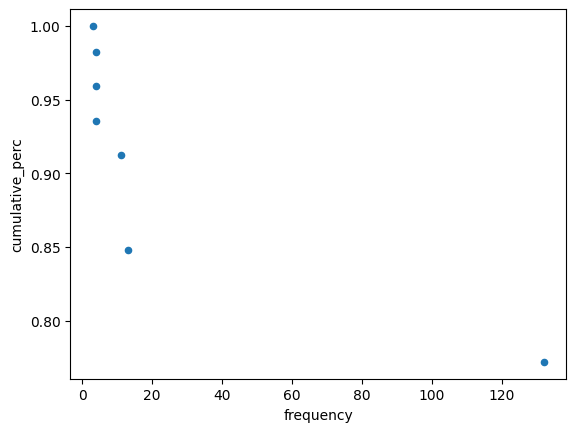

In [ ]:
#Realizamos grafico de dispersión del dataframe filtrado
Filtro12_index.plot("frequency", "cumulative_perc", kind="scatter")

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table13= freq_tbl(data['6_change_employees_average_salary_last_year'])
table13

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro13= table13[table13["frequency"]>1]
Filtro13

In [ ]:
#Ajusto el indice de mi dataframe
Filtro13_index= Filtro13.set_index('6_change_employees_average_salary_last_year')
Filtro13_index

,frequency,percentage,cumulative_perc
6_change_employees_average_salary_last_year,,,
No cambió,136,0.795322,0.795322
Aumentó 15%,14,0.081871,0.877193
Disminuyó 15%,5,0.029240,0.906433
Aumentó 25%,4,0.023392,0.929825
Aumentó 50% o más,4,0.023392,0.953216
Disminuyó 25%,3,0.017544,0.970760


<Axes: xlabel='6_change_employees_average_salary_last_year'>

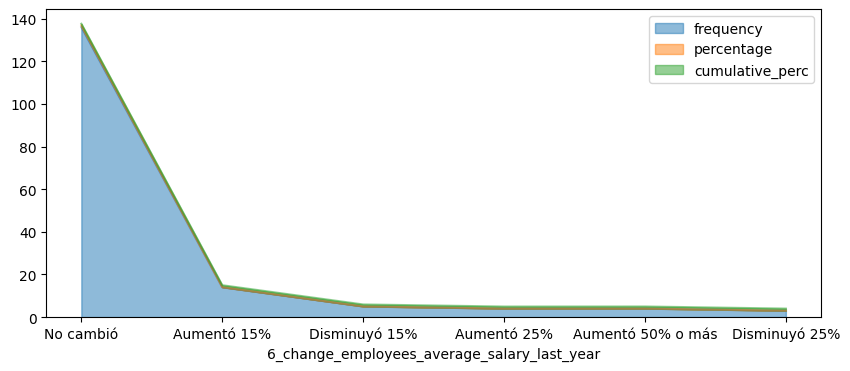

In [ ]:
#Realizamos grafico de área del dataframe filtrado
Filtro13_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table14= freq_tbl(data['20_reviews_finances_monthly'])
table14

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro14= table14[table14["frequency"]>1]
Filtro14

In [ ]:
#Ajusto el indice de mi dataframe
Filtro14_index= Filtro14.set_index('20_reviews_finances_monthly')
Filtro14_index

,frequency,percentage,cumulative_perc
20_reviews_finances_monthly,,,
yes,127,0.74269,0.74269
no,44,0.25731,1.00000


<Axes: ylabel='frequency'>

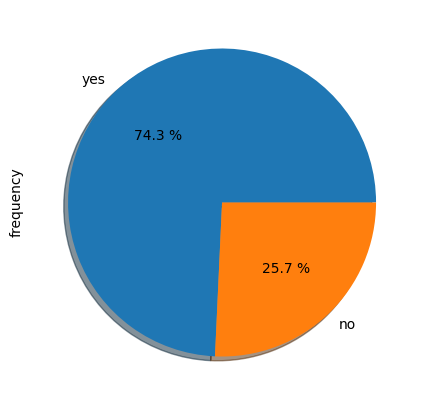

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro14_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table15= freq_tbl(data['49_inventory_records'])
table15

In [ ]:
#Obtengo un filtro de los valores más relevantes de la variables categórica seleccionada
Filtro15= table15[table15["frequency"]>1]
Filtro15

In [ ]:
#Ajusto el indice de mi dataframe
Filtro15_index= Filtro15.set_index('49_inventory_records')
Filtro15_index

,frequency,percentage,cumulative_perc
49_inventory_records,,,
Software especializado + computadora,82,0.479532,0.479532
En papel,40,0.233918,0.713450
En Excel,20,0.116959,0.830409
No lo hago,18,0.105263,0.935673
"En Excel,En papel",7,0.040936,0.976608


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

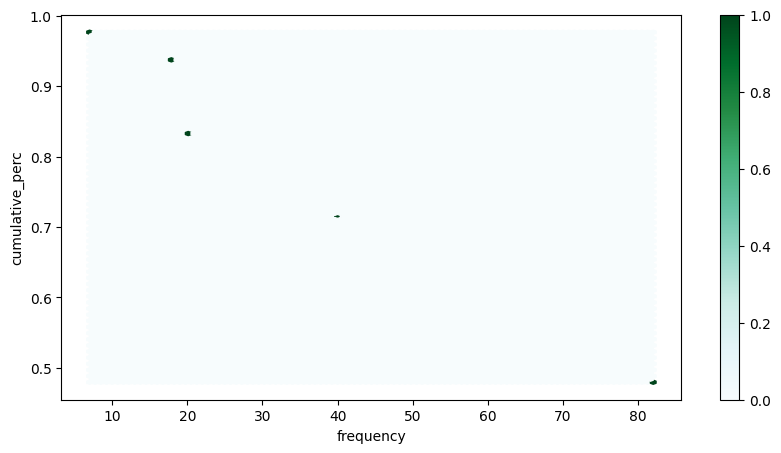

In [ ]:
#Realizamos grafico hexagonal del dataframe filtrado, alternativo al scatter plot
Filtro15_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table16= freq_tbl(data['18_sales_records'])
table16

In [ ]:
#Obtengo un filtro de los valores más relevantes de la variables categórica seleccionada
Filtro16= table16[table16["frequency"]>1]
Filtro16

In [ ]:
#Ajusto el indice de mi dataframe
Filtro16_index= Filtro16.set_index('18_sales_records')
Filtro16_index

,frequency,percentage,cumulative_perc
18_sales_records,,,
En papel,67,0.391813,0.391813
Software especializado + computadora,26,0.152047,0.543860
No lo hago,24,0.140351,0.684211
En Excel,21,0.122807,0.807018
"En Excel,En papel",12,0.070175,0.877193
Caja registradora (análoga),6,0.035088,0.912281
"Aplicación móvil (i.e. App) + smartphone,Caja registradora (análoga),Software especializado + computadora",5,0.029240,0.941520
"Caja registradora (análoga),En Excel,En papel",3,0.017544,0.959064


Text(0, 0.5, 'Frecuencia')

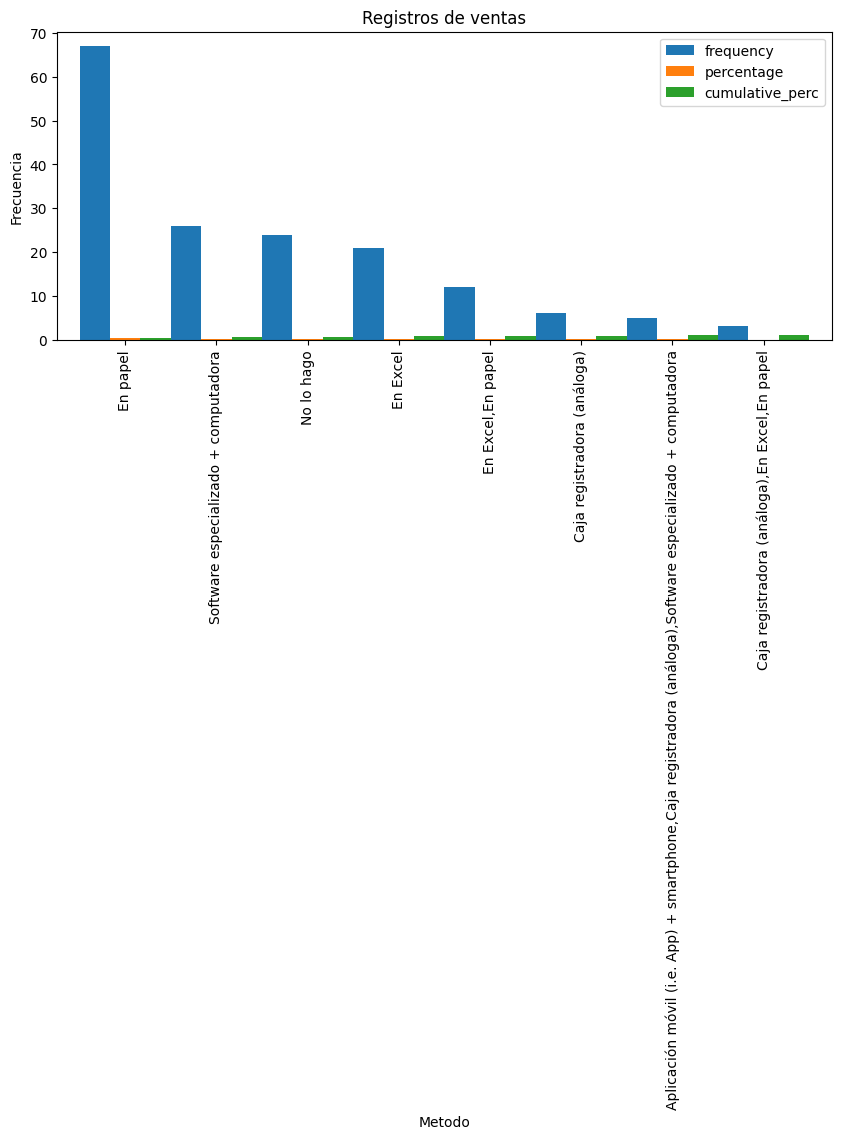

In [109]:
#Realizamos grafico de barras del dataframe filtrado
Filtro16_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Registros de ventas')
plt.xlabel('Metodo')
plt.ylabel('Frecuencia')

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table17= freq_tbl(data['155_sales_registers_used_for'])
table17

In [ ]:
#Obtengo un filtro de los valores más relevantes de la variables categórica seleccionada
Filtro17= table17[table17["frequency"]>1]
Filtro17

In [114]:
#Ajusto el indice de mi dataframe
Filtro17_index= Filtro17.set_index('155_sales_registers_used_for')
Filtro17_index

,frequency,percentage,cumulative_perc
155_sales_registers_used_for,,,
No los uso,133,0.777778,0.777778
PEPS,20,0.116959,0.894737
Se lleva al día,18,0.105263,1.000000


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

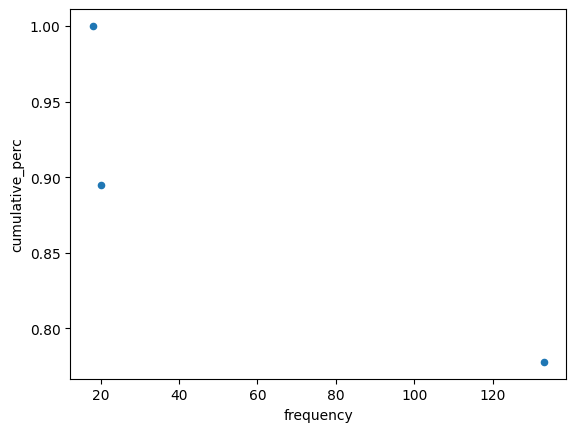

In [115]:
#Realizamos grafico de dispersión del dataframe filtrado
Filtro17_index.plot("frequency", "cumulative_perc", kind="scatter")

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table18= freq_tbl(data['103_number_own_fridges'])
table18

In [ ]:
#Obtengo un filtro de los valores más relevantes de la variables categórica seleccionada
Filtro18= table18[table18["frequency"]>1]
Filtro18

In [119]:
#Ajusto el indice de mi dataframe
Filtro18_index= Filtro18.set_index('103_number_own_fridges')
Filtro18_index

,frequency,percentage,cumulative_perc
103_number_own_fridges,,,
1,144,0.842105,0.842105
0.0,8,0.046784,0.888889
1.0,6,0.035088,0.923977
2.0,6,0.035088,0.959064
3.0,2,0.011696,0.970760
7.0,2,0.011696,0.982456
5.0,2,0.011696,0.994152


<Axes: xlabel='103_number_own_fridges'>

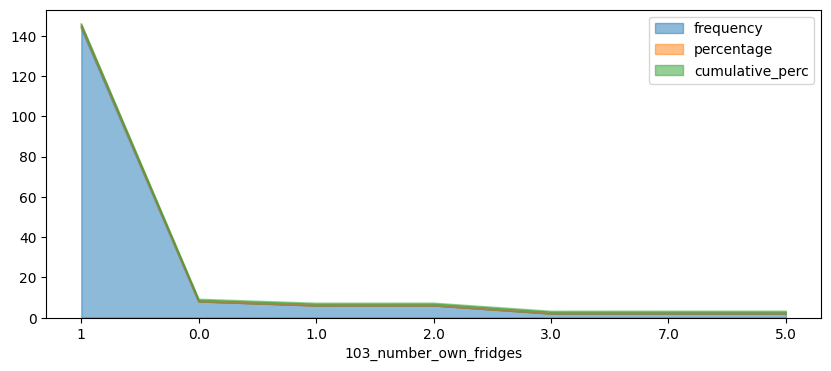

In [121]:
#Realizamos grafico de área del dataframe filtrado
Filtro18_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table19= freq_tbl(data['19_tax_id'])
table19

In [ ]:
#Obtengo un filtro de los valores más relevantes de la variables categórica seleccionada
Filtro19= table19[table19["frequency"]>1]
Filtro19

In [124]:
#Ajusto el indice de mi dataframe
Filtro19_index= Filtro19.set_index('19_tax_id')
Filtro19_index

,frequency,percentage,cumulative_perc
19_tax_id,,,
NaN,71,0.415205,0.415205
yes,70,0.409357,0.824561
no,30,0.175439,1.000000


<Axes: ylabel='frequency'>

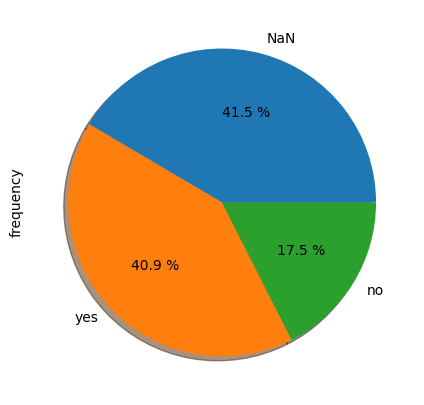

In [126]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro19_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table20= freq_tbl(data['310_burnout'])
table20

In [ ]:
#Obtengo un filtro de los valores más relevantes de la variables categórica seleccionada
Filtro20= table20[table20["frequency"]>1]
Filtro20

In [129]:
#Ajusto el indice de mi dataframe
Filtro20_index= Filtro20.set_index('310_burnout')
Filtro20_index

,frequency,percentage,cumulative_perc
310_burnout,,,
no,68,0.397661,0.397661
NaN,64,0.374269,0.771930
yes,39,0.228070,1.000000


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

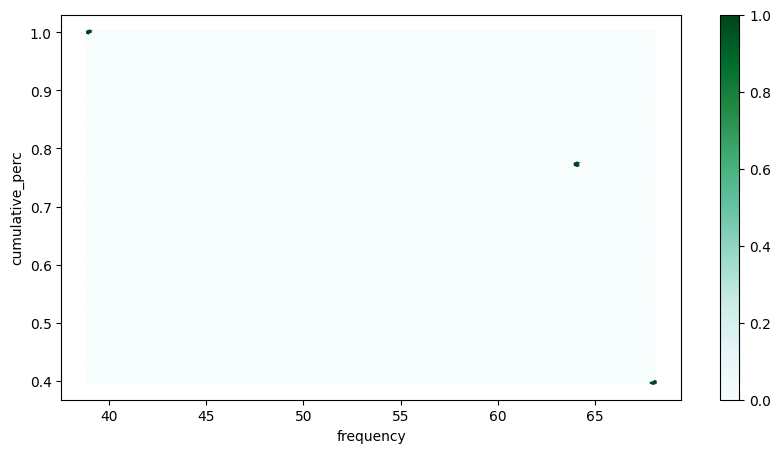

In [131]:
#Realizamos grafico hexagonal del dataframe filtrado, alternativo al scatter plot
Filtro20_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))